In [1]:
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn import metrics
#import matplotlib.pyplot as plt
#%matplotlib inline
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("./data/train_users.csv")

### BASE ACCURACY MUST BE > 0.583461 (i.e. NULL ACCURACY)

In [ ]:
y = data.country_destination
y.value_counts()

In [ ]:
y.value_counts().head(1) / float(len(y)) # NDF / ALL

In [39]:
data.country_destination.value_counts()

NDF      124549
US        62380
other     10095
FR         5023
IT         2836
GB         2325
ES         2249
CA         1428
DE         1061
NL          763
AU          539
PT          218
Name: country_destination, dtype: int64

### Fix ages

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213466 entries, 0 to 213465
Data columns (total 17 columns):
id                         213466 non-null object
date_account_created       213466 non-null object
timestamp_first_active     213466 non-null int64
date_first_booking         88908 non-null object
gender                     213466 non-null category
age                        125474 non-null float64
signup_method              213466 non-null object
signup_flow                213466 non-null int64
language                   213466 non-null object
affiliate_channel          213466 non-null object
affiliate_provider         213466 non-null object
first_affiliate_tracked    207401 non-null object
signup_app                 213466 non-null object
first_device_type          213466 non-null object
first_browser              213466 non-null object
country_destination        213466 non-null object
age_attr                   213466 non-null float64
dtypes: category(1), float64(2), int64

In [45]:
data[data.first_affiliate_tracked.isnull()]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_attr
12,k6np330cm1,2010-01-05,20100105060859,2010-01-18,-unknown-,NaN,basic,0,en,direct,direct,NaN,Web,Other/Unknown,-unknown-,FR,0
16,2dwbwkx056,2010-01-07,20100107215125,NaN,-unknown-,NaN,basic,0,en,other,craigslist,NaN,Web,Other/Unknown,-unknown-,NDF,0
17,frhre329au,2010-01-07,20100107224625,2010-01-09,-unknown-,31,basic,0,en,other,craigslist,NaN,Web,Other/Unknown,-unknown-,US,31
18,cxlg85pg1r,2010-01-08,20100108015641,NaN,-unknown-,NaN,basic,0,en,seo,facebook,NaN,Web,Other/Unknown,-unknown-,NDF,0
20,qdubonn3uk,2010-01-10,20100110152120,2010-01-18,-unknown-,NaN,basic,0,en,direct,direct,NaN,Web,Other/Unknown,-unknown-,US,0
28,tp6x3md0n4,2010-01-13,20100113044650,2010-01-13,-unknown-,35,basic,0,en,direct,direct,NaN,Web,Other/Unknown,-unknown-,FR,35
31,pggg2sj27u,2010-01-14,20100114060757,NaN,MALE,31,basic,0,en,direct,direct,NaN,Web,Other/Unknown,-unknown-,NDF,31
33,qthj88nnc7,2010-01-14,20100114175209,NaN,MALE,29,basic,0,en,other,craigslist,NaN,Web,Other/Unknown,-unknown-,NDF,29
35,ugy4obax11,2010-01-15,20100115082711,NaN,-unknown-,49,basic,0,en,sem-non-brand,google,NaN,Web,Other/Unknown,-unknown-,NDF,49
42,2981o5kr7b,2010-01-21,20100121070939,NaN,FEMALE,29,basic,0,en,direct,direct,NaN,Web,Other/Unknown,-unknown-,NDF,29


In [ ]:
data[data.age.isnull()]

In [4]:
data["age_attr"] = data.age.copy()
data.age_attr[data.age_attr > 116] = 0
data.age_attr[data.age_attr < 15] = 0
data.age_attr.fillna(value=0, inplace=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [ ]:
X = pd.core.frame.DataFrame()
X["age"] = data["age_attr"]

In [ ]:
print X.shape
print y.shape

In [ ]:
X.age.value_counts()

### Set genders

In [ ]:
for value in data.gender.unique():
    x = data.gender.copy()
    x[x != value] = 0
    x[x == value] = 1    
    data["gender_%s"%value.replace("-","_")] = x
    X["gender_%s"%value.replace("-","_")] = x

In [ ]:
X.gender__unknown_.value_counts()

In [ ]:
data.gender.value_counts()

### Set month_acct_created (IGNORE day_acct_created & diff_days_active_signedup)

In [ ]:
#data.day_acct_created = data.date_account_created.apply(lambda x: int(x.split("-")[2]))
data.month_acct_created = data.date_account_created.apply(lambda x: int(x.split("-")[1]))
data.month_acct_created.value_counts()

In [ ]:
date_acct_created_date = data.date_account_created.apply(lambda x: datetime.datetime(int(x.split("-")[0]), int(x.split("-")[1]), int(x.split("-")[2]), 0,0,0))
date_first_active_date = data.timestamp_first_active.apply(lambda x: pd.to_datetime(str(x/1000000), format='%Y%m%d'))


In [ ]:
data["diff_days_active_signedup"] = (date_acct_created_date - date_first_active_date).astype('timedelta64[D]')

In [ ]:
data[["diff_days_active_signedup", "date_account_created", "timestamp_first_active"]]
#type(data.timestamp_first_active[0])

In [ ]:
data[data.diff_days_active_signedup > 0].country_destination.value_counts()

In [ ]:
#X["diff_days_active_signedup"] = data["diff_days_active_signedup"]
#X["day_acct_created"] = data["day_acct_created"]
X["month_acct_created"] = data.month_acct_created

In [ ]:
print X.head()
print X.shape

### Set signup_method

In [ ]:
data.signup_method.value_counts()

In [ ]:
for value in data.signup_method.unique():
    x = data.signup_method.copy()
    x[x != value] = 0
    x[x == value] = 1    
    data["signup_%s"%value] = x
    X["signup_%s"%value] = x

In [ ]:
print X.head()
print X.shape

### Set signup_flow

In [ ]:
data.signup_flow.value_counts()

In [ ]:
for value in data.signup_flow.unique():
    x = data.signup_flow.copy()
    if value == 0:
        x[x == value] = 99
        x[x != 99] = 0
        x[x == 99] = 1
    elif value == 1:        
        x[x == value] = 99
        x[x != 99] = 0
        x[x == 99] = 1
    else:
        x[x != value] = 0
        x[x == value] = 1
        
    data["signup_flow_%d"%value] = x
    X["signup_flow_%d"%value] = x

In [ ]:
X.signup_flow_21.value_counts()

### Set language

In [ ]:
data.language.value_counts()

In [ ]:
data[data.language == "zh"].country_destination.value_counts()

In [ ]:
for value in data.language.unique():
    x = data.language.copy()
    x[x != value] = 0
    x[x == value] = 1    
    data["language_%s"%value] = x
    X["language_%s"%value] = x

In [ ]:
X.language_en.value_counts()

### Set affiliate_channel

In [ ]:
data.affiliate_channel.value_counts()

In [ ]:
for value in data.affiliate_channel.unique():
    x = data.affiliate_channel.copy()
    x[x != value] = 0
    x[x == value] = 1    
    data["aff_chnl_%s"%value.replace("-", "_").replace(" ", "_")] = x
    X["aff_chnl_%s"%value.replace("-", "_").replace(" ", "_")] = x

In [ ]:
X.aff_chnl_other.value_counts()

In [ ]:
print X.columns[29:]
print X.shape

### Set affiliate_provider

In [ ]:
data.affiliate_provider.value_counts()

In [ ]:
for value in data.affiliate_provider.unique():
    x = data.affiliate_provider.copy()
    x[x != value] = 0
    x[x == value] = 1    
    data["aff_prov_%s"%value.replace("-", "_").replace(" ", "_")] = x
    X["aff_prov_%s"%value.replace("-", "_").replace(" ", "_")] = x

In [ ]:
X.aff_prov_email_marketing.value_counts()

In [ ]:
print X.shape

### Set first_affiliate_tracked

In [ ]:
data.first_affiliate_tracked.value_counts()

In [ ]:
for value in data.first_affiliate_tracked.unique():
    #print "processing value: %s" % value
    x = data.first_affiliate_tracked.copy()
    x[x != value] = 0
    x[x == value] = 1
    try:
        data["first_aff_tracked_%s"%value.replace("-", "_").replace(" ", "_")] = x
        X["first_aff_tracked_%s"%value.replace("-", "_").replace(" ", "_")] = x
    except Exception:
        data["first_aff_tracked_%s"%value] = x
        X["first_aff_tracked_%s"%value] = x
        

In [ ]:
X.first_aff_tracked_local_ops.value_counts()

### Set signup_app

In [ ]:
data.signup_app.value_counts()

In [ ]:
for value in data.signup_app.unique():
    x = data.signup_app.copy()
    x[x != value] = 0
    x[x == value] = 1    
    data["signup_app_%s"%value.replace("-", "_").replace(" ", "_")] = x
    X["signup_app_%s"%value.replace("-", "_").replace(" ", "_")] = x

In [ ]:
X.signup_app_Android.value_counts()

### Set first_device_type

In [ ]:
data.first_device_type.value_counts()

In [ ]:
for value in data.first_device_type.unique():
    x = data.first_device_type.copy()
    x[x != value] = 0
    x[x == value] = 1    
    data["first_dev_%s"%value.replace("-", "_").replace(" ", "_").replace("/", "_").replace("(", "_").replace(")", "_")] = x
    X["first_dev_%s"%value.replace("-", "_").replace(" ", "_").replace("/", "_").replace("(", "_").replace(")", "_")] = x

In [ ]:
X.first_dev_Desktop__Other_.value_counts()

### Set first_browser

In [ ]:
data.first_browser.value_counts()

In [ ]:
for value in data.first_browser.unique():
    x = data.first_browser.copy()
    x[x != value] = 0
    x[x == value] = 1    
    data["first_browser_%s"%value.replace("-", "_").replace(" ", "_").replace("/", "_").replace("(", "_").replace(")", "_")] = x
    X["first_browser_%s"%value.replace("-", "_").replace(" ", "_").replace("/", "_").replace("(", "_").replace(")", "_")] = x

In [ ]:
X.first_browser_Chrome.value_counts()

In [ ]:
y = pd.core.frame.DataFrame()
y["country_destination"] = data.country_destination
print y.shape
print X.shape

In [ ]:
X.to_csv('./data/X.csv', index=False)
y.to_csv('./data/y.csv', index=False)

## Check feature-class relation by histograms

In [ ]:
fig, axs = plt.subplots(ncols=2)
print "min age: ", data.age_attr.min()
print "max age: ", data.age_attr.max()

data.groupby("country_destination").age_attr.plot(kind='kde', ax=axs[1])
data.groupby("country_destination").age_attr.hist(alpha=0.4, bins=8, ax=axs[0])


In [ ]:
print data.gender__unknown_.value_counts()

In [ ]:
data[data.country_destination=="NDF"].age_attr.hist()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

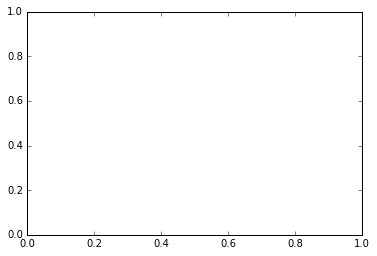

In [17]:
data.boxplot(column=u'gender', by=u'country_destination')

TypeError: unsupported operand type(s) for /: 'str' and 'int'

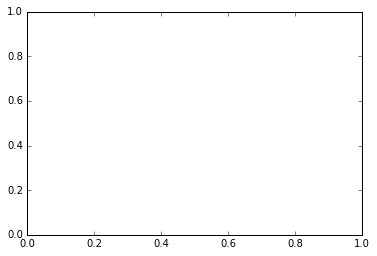

In [13]:
data.boxplot(column=u'signup_method', by=u'country_destination')

In [ ]:
data["age_attr"].plot.bar()

In [8]:
#data.gender[:100].plot()
df = data.groupby("country_destination")
print(df.describe())

                                    age      age_attr   signup_flow  \
country_destination                                                   
AU                  count    436.000000    539.000000    539.000000   
                    mean      42.807339     30.890538      2.178108   
                    std       95.623926     19.569937      6.161836   
                    min       18.000000      0.000000      0.000000   
                    25%       29.000000     26.000000      0.000000   
                    50%       35.000000     32.000000      0.000000   
                    75%       44.000000     40.000000      0.000000   
                    max     2014.000000    110.000000     25.000000   
CA                  count   1077.000000   1428.000000   1428.000000   
                    mean      48.990715     28.486695      1.970588   
                    std      147.787977     20.335910      5.749791   
                    min       18.000000      0.000000      0.000000   
      

country_destination
AU       [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
CA       [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
DE       [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
ES       [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
FR       [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
GB       [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
IT       [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
NDF      [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
NL       [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
PT       [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
US       [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
other    [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
dtype: object

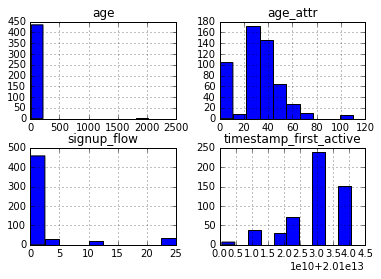

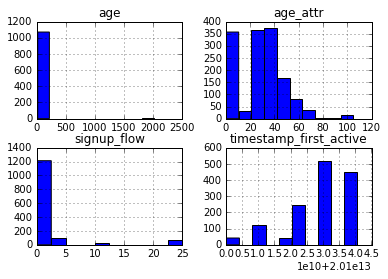

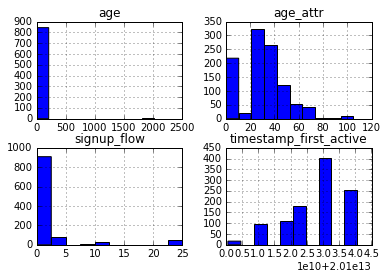

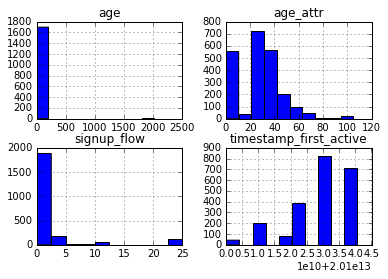

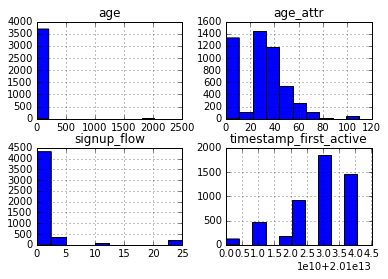

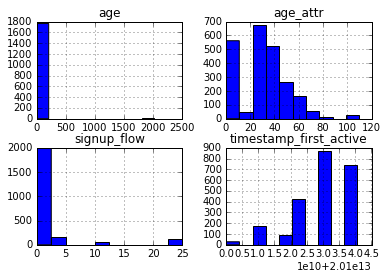

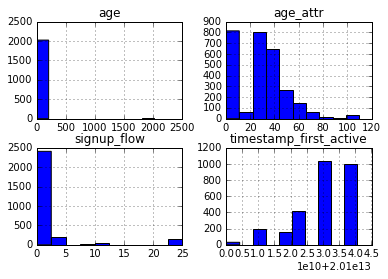

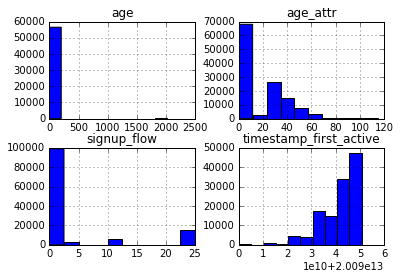

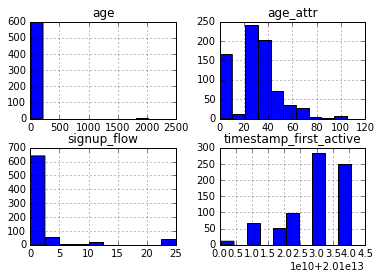

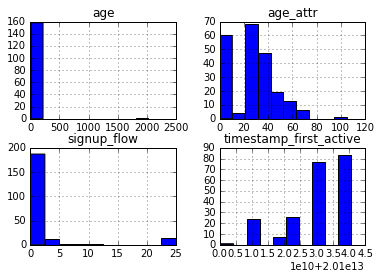

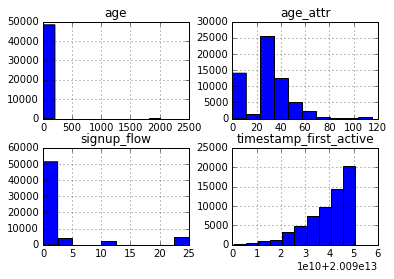

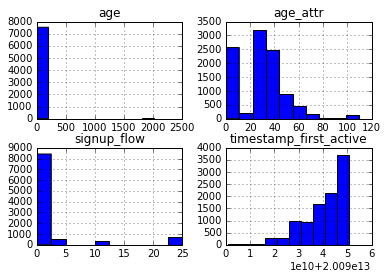

In [11]:
data.groupby('country_destination').hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109e26b10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10b3b9a90>]], dtype=object)

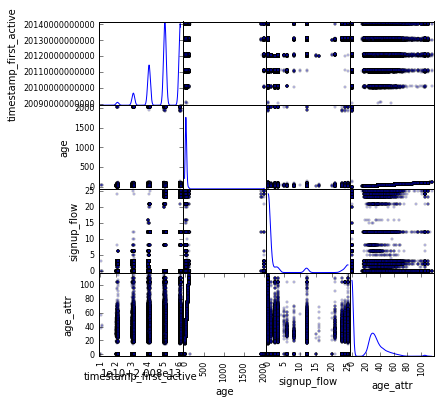

In [9]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(data, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [ ]:
data.corr()

In [10]:
data.cov()

,timestamp_first_active,age,signup_flow,age_attr
timestamp_first_active,8.563237e+19,-5.263027e+10,1.390239e+10,-1.617091e+10
age,-5.263027e+10,2.422962e+04,-1.900183e+01,-2.620907e+02
signup_flow,1.390239e+10,-1.900183e+01,5.833133e+01,-2.086054e+01
age_attr,-1.617091e+10,-2.620907e+02,-2.086054e+01,4.537638e+02


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213466 entries, 0 to 213465
Data columns (total 17 columns):
id                         213466 non-null object
date_account_created       213466 non-null object
timestamp_first_active     213466 non-null int64
date_first_booking         88908 non-null object
gender                     213466 non-null category
age                        125474 non-null float64
signup_method              213466 non-null object
signup_flow                213466 non-null int64
language                   213466 non-null object
affiliate_channel          213466 non-null object
affiliate_provider         213466 non-null object
first_affiliate_tracked    207401 non-null object
signup_app                 213466 non-null object
first_device_type          213466 non-null object
first_browser              213466 non-null object
country_destination        213466 non-null object
age_attr                   213466 non-null float64
dtypes: category(1), float64(2), int64

In [15]:
data["gender"] = data.gender.astype("category")

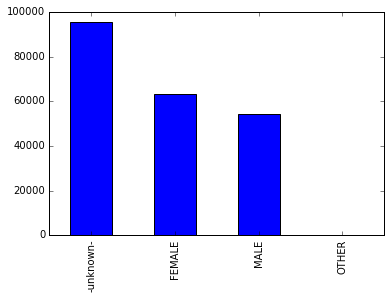

In [29]:
 data.gender.value_counts().plot(kind="bar")

In [34]:
df_dummy = pd.get_dummies(data["gender"], prefix="gender")

In [36]:
df_dummy

,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
5,1,0,0,0
6,0,1,0,0
7,0,1,0,0
8,0,1,0,0
9,1,0,0,0
